In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.options.display.float_format = '{:20,.4f}'.format

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv"
bike_data = pd.read_csv(data_url, encoding = "latin")

bike_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2000,37,2.2000,2000,-17.6000,0.0000,0.0000,0.0000,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5000,38,0.8000,2000,-17.6000,0.0000,0.0000,0.0000,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0000,39,1.0000,2000,-17.7000,0.0000,0.0000,0.0000,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2000,40,0.9000,2000,-17.6000,0.0000,0.0000,0.0000,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0000,36,2.3000,2000,-18.6000,0.0000,0.0000,0.0000,Winter,No Holiday,Yes


### Data validity checks

In [3]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [4]:
bike_data.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [5]:
bike_data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

We can see that the dataset has 8760 rows and 14 columns. There are no missing values in the dataset.
There are four columns of type object. While the columns Seasons, Holiday and Functioning Day are categorical, Date is not.
The columns Rented Bike Count, Hour, Humidity and Visibility are of type int64, i.e., discrete values. Then, the remaining variables, namely, Temperature, Wind speed, Dew point temperature, Solar Radiation, Rainfall and Snowfall are floating numbers.

For easier handling down the road, the feature names are adapted.

In [6]:
bike_data = bike_data.rename(columns={'Temperature(°C)':'Temperature',
                                      'Humidity(%)':'Humidity',
                                      'Rainfall(mm)':'Rainfall',
                                      'Snowfall (cm)':'Snowfall',
                                      'Wind speed (m/s)':'Wind speed',
                                      'Visibility (10m)':'Visibility',
                                      'Solar Radiation (MJ/m2)':'Solar radiation',
                                      'Dew point temperature(°C)':'Dew point temperature'}
                            )

### 2 - Exploratory Data Analysis

In [7]:
bike_data.describe()

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar radiation,Rainfall,Snowfall
count,"8,760.0000","8,760.0000","8,760.0000","8,760.0000","8,760.0000","8,760.0000","8,760.0000","8,760.0000","8,760.0000","8,760.0000"
mean,704.6021,11.5000,12.8829,58.2263,1.7249,"1,436.8258",4.0738,0.5691,0.1487,0.0751
std,644.9975,6.9226,11.9448,20.3624,1.0363,608.2987,13.0604,0.8687,1.1282,0.4367
min,0.0000,0.0000,-17.8000,0.0000,0.0000,27.0000,-30.6000,0.0000,0.0000,0.0000
25%,191.0000,5.7500,3.5000,42.0000,0.9000,940.0000,-4.7000,0.0000,0.0000,0.0000
50%,504.5000,11.5000,13.7000,57.0000,1.5000,"1,698.0000",5.1000,0.0100,0.0000,0.0000
75%,"1,065.2500",17.2500,22.5000,74.0000,2.3000,"2,000.0000",14.8000,0.9300,0.0000,0.0000
max,"3,556.0000",23.0000,39.4000,98.0000,7.4000,"2,000.0000",27.2000,3.5200,35.0000,8.8000


We can see, that Rented Bike Count, Solar Radiation, Rainfall and Snowfall are highly right skewed (mean > median)

array([<AxesSubplot:title={'center':'Snowfall'}>], dtype=object)

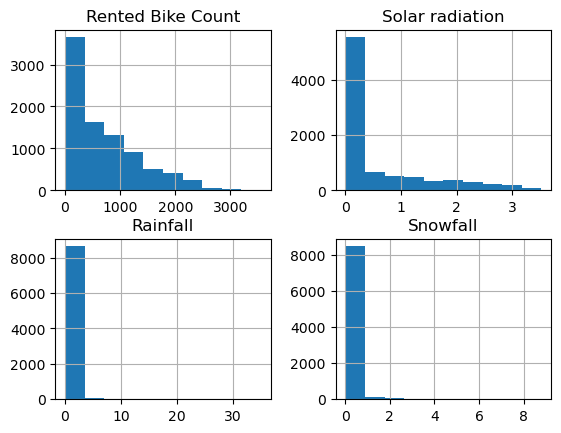

In [8]:
fig, axes = plt.subplots(2, 2)

bike_data.hist('Rented Bike Count', ax=axes[0][0])
bike_data.hist('Solar radiation', ax=axes[0][1])
bike_data.hist('Rainfall', ax=axes[1][0])
bike_data.hist('Snowfall', ax=axes[1][1])

We can see that Rainfall and Snowfall is highly skewed because almost all values are 0.

On the other hand, Temperature, Dew point temperature, are left skewed (mean < median).

array([<AxesSubplot:title={'center':'Dew point temperature'}>],
      dtype=object)

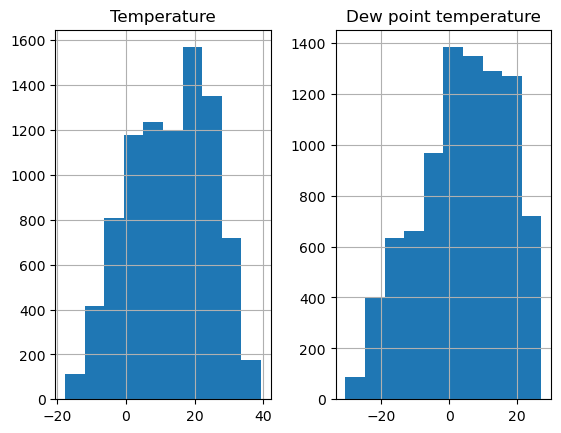

In [9]:
fig, axes = plt.subplots(1, 2)

bike_data.hist('Temperature', ax=axes[0])
bike_data.hist('Dew point temperature', ax=axes[1])

#### Check the numbers for the categorical variables

In [10]:
bike_data.groupby('Seasons').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

,Seasons,Rented Bike Count
0,Summer,2283234
1,Autumn,1790002
2,Spring,1611909
3,Winter,487169


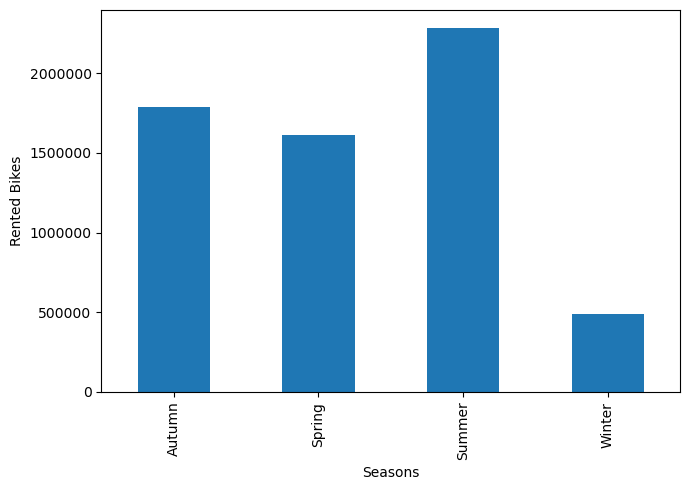

In [11]:
fig, ax = plt.subplots(figsize = (7, 5))
ax = bike_data.groupby('Seasons').sum()['Rented Bike Count'].plot.bar()
ax.ticklabel_format(style='plain', axis="y")
ax.set_ylabel('Rented Bikes')
fig.tight_layout()
fig.savefig('seasons.png')

Most bikes seem to be rented in summer followed by autumn and spring.

In [12]:
bike_data.groupby('Holiday').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

,Holiday,Rented Bike Count
0,No Holiday,5956419
1,Holiday,215895


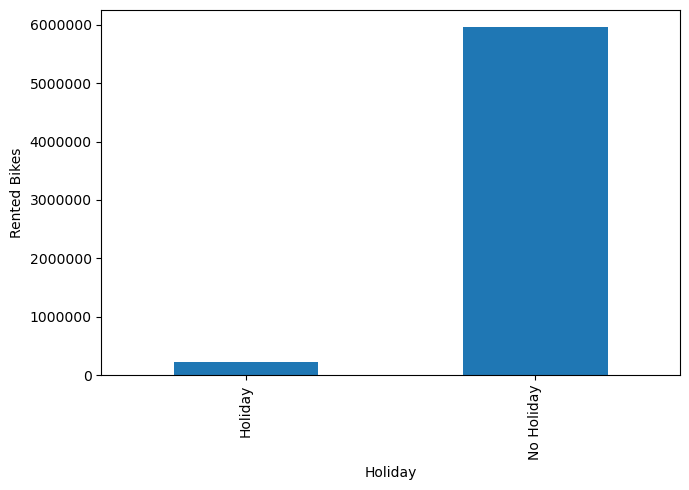

In [13]:
fig, ax = plt.subplots(figsize = (7, 5))
ax = bike_data.groupby('Holiday').sum()['Rented Bike Count'].plot.bar()
ax.ticklabel_format(style='plain', axis="y")
ax.set_ylabel('Rented Bikes')
fig.tight_layout()
fig.savefig('holiday.png')

Interestingly, on days where there is no holiday, more bikes are rented. This means that the customers could be more working customers rather than customers who rent the bike for fun.

In [14]:
bike_data.groupby('Functioning Day').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

,Functioning Day,Rented Bike Count
0,Yes,6172314
1,No,0


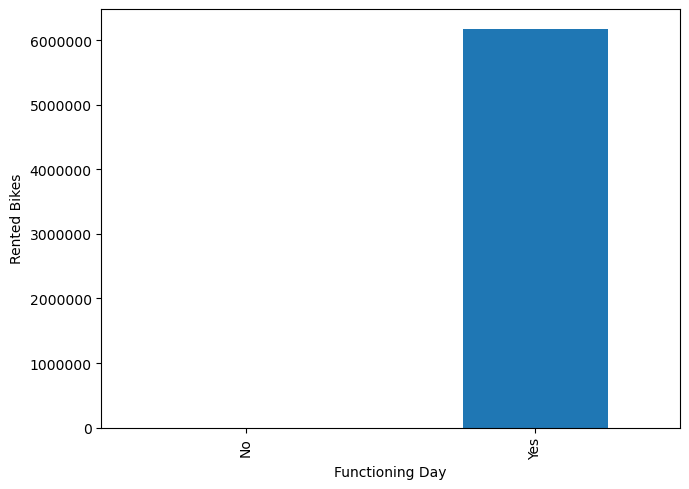

In [15]:
fig, ax = plt.subplots(figsize = (7, 5))
ax = bike_data.groupby('Functioning Day').sum()['Rented Bike Count'].plot.bar()
ax.ticklabel_format(style='plain', axis="y")
ax.set_ylabel('Rented Bikes')
fig.tight_layout()
fig.savefig('functioning_day.png')

In [16]:
bike_data.groupby('Functioning Day').count()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar radiation,Rainfall,Snowfall,Seasons,Holiday
Functioning Day,,,,,,,,,,,,,
No,295,295,295,295,295,295,295,295,295,295,295,295,295
Yes,8465,8465,8465,8465,8465,8465,8465,8465,8465,8465,8465,8465,8465


There are 295 dates where there is no functioning day. On these days, the rental shop seems to be closed because there are no rentals. Because of this we can remove the dates from the data where Function Day is 'No' and then drop the variable. 

In [17]:
bike_data.shape

(8760, 14)

In [18]:
# drop the observations from a non functioning day
bike_data = bike_data.loc[bike_data['Functioning Day'] != 'No']

# drop the variable altogether
bike_data.drop('Functioning Day', axis = 1, inplace = True)

bike_data.shape

(8465, 13)

Now, the observations on a non functioning day are removed and also the variable itself.

<AxesSubplot:>

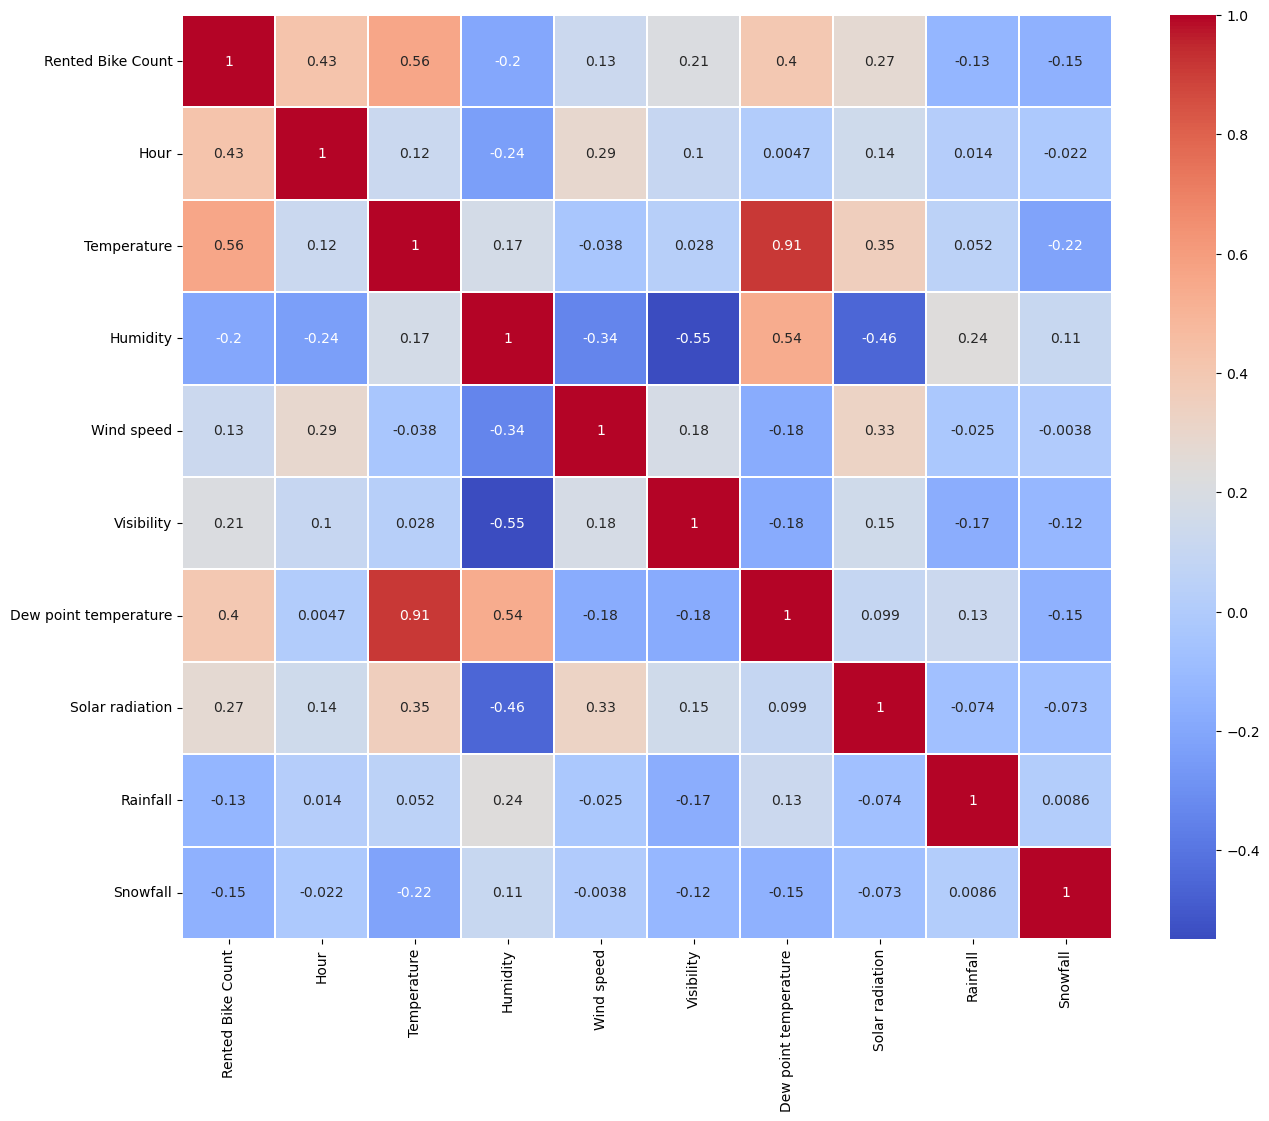

In [19]:
data_corr= bike_data.corr()       
plt.figure(figsize=(15,12))
sns.heatmap(data_corr, cmap = "coolwarm", linewidths=0.1, annot=True, linecolor='white')

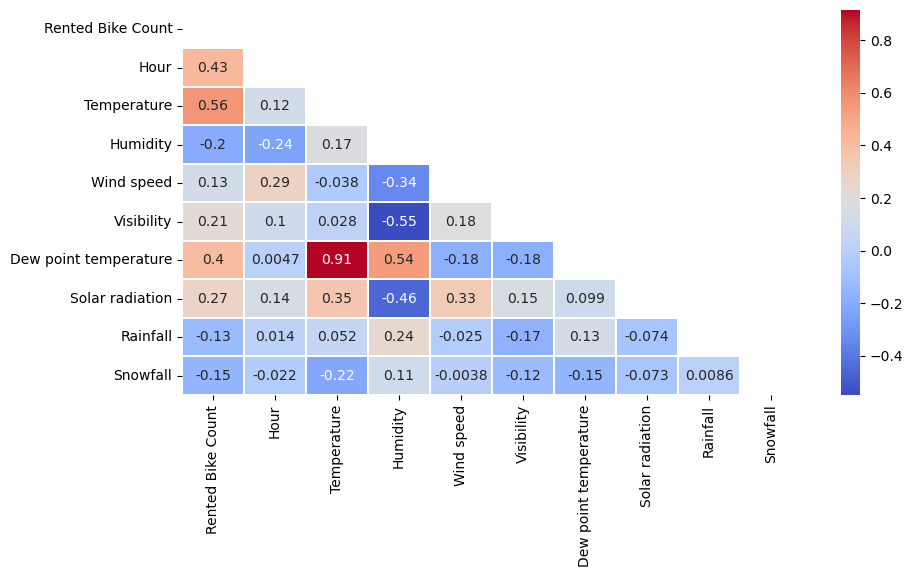

In [20]:
# plot only the upper half of the correlation matrix
matrix = np.triu(data_corr)

plt.figure(figsize=(10,5))

# using the upper triangle matrix as mask 
triangle_heatmap = sns.heatmap(data_corr, cmap = "coolwarm", linewidths=0.1, annot=True, linecolor='white', mask=matrix)
fig = triangle_heatmap.get_figure()
fig.savefig("triangle_heatmap.png", bbox_inches="tight") 

We can see that Temperature and Dew Point Temperature have a high correlation coefficient of 0.91. Because this is a case of multicollinearity, we need to drop one of the variables. We drop Dew Point Temperature.

In [21]:
bike_data.drop('Dew point temperature', axis = 1, inplace = True)

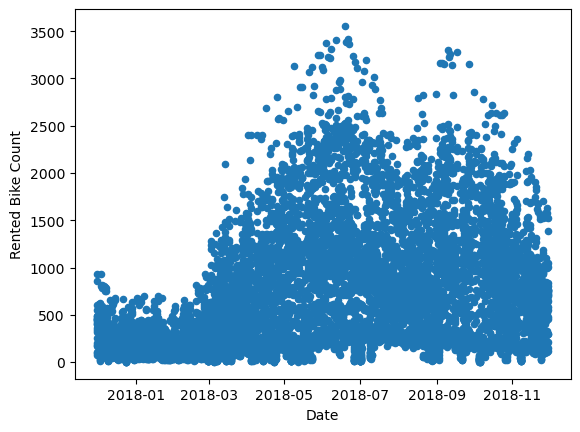

In [22]:
# convert the Date into a DateTime object to be able to extract the day month and year from it
bike_data['Date'] = pd.to_datetime(bike_data['Date'], format = "%d/%m/%Y")

# create a plot to see how the rented bikes change over time
bike_data.plot.scatter(x = 'Date', y = 'Rented Bike Count')
plt.show()

There seems to be a upward trend over time regarding the rented bikes. However, it is no clear relationship visible.

### 3 - Feature preprocessing

In [23]:
# extract the day, month and year from the data column because the date itself cannot be used in the model
bike_data['Day'] = bike_data['Date'].dt.day
bike_data['Month'] = bike_data['Date'].dt.month
bike_data['Year'] = bike_data['Date'].dt.year

In [24]:
bike_data['Seasons'] = bike_data['Seasons'].astype('category').cat.reorder_categories(['Spring', 'Summer', 'Autumn', 'Winter']).cat.codes
bike_data['Holiday'] = bike_data['Holiday'].astype('category').cat.reorder_categories(['No Holiday', 'Holiday']).cat.codes

bike_data.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Solar radiation,Rainfall,Snowfall,Seasons,Holiday,Day,Month,Year
0,2017-12-01,254,0,-5.2000,37,2.2000,2000,0.0000,0.0000,0.0000,3,0,1,12,2017
1,2017-12-01,204,1,-5.5000,38,0.8000,2000,0.0000,0.0000,0.0000,3,0,1,12,2017
2,2017-12-01,173,2,-6.0000,39,1.0000,2000,0.0000,0.0000,0.0000,3,0,1,12,2017
3,2017-12-01,107,3,-6.2000,40,0.9000,2000,0.0000,0.0000,0.0000,3,0,1,12,2017
4,2017-12-01,78,4,-6.0000,36,2.3000,2000,0.0000,0.0000,0.0000,3,0,1,12,2017


In [25]:
print(bike_data['Seasons'].unique())
print(bike_data['Holiday'].unique())

[3 0 1 2]
[0 1]


### 5 - Model implementation

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.metrics import r2_score, mean_absolute_error

import time

In [27]:
from sklearn.preprocessing import StandardScaler

def train_model(model, X_train, y_train, X_test):
    scaler = StandardScaler()
    
    # scale features
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # fit the model
    start_timer = time.time()

    model_fit = model.fit(X_train_scaled, y_train)
    
    end_timer = time.time()
    
    time_needed = end_timer - start_timer
    
    return model_fit, time_needed

def predict_data(model, model_name, X_train, X_test, y_test, fitting_time, color):
    scaler = StandardScaler()
    
    # scale features
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # predict target
    y_pred = model.predict(X_test_scaled)
    
    print(f'{model_name}:')
    # plot actual vs. predicted values
    fig, ax = plt.subplots(figsize = (6, 3))
    plt.scatter(y_test, y_pred, color=color, alpha=0.5)
    plt.title(f'Actual vs. Predicted  {model_name}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()
    model_score = model.score(X_test_scaled, y_test)
    print(f'R^2 is {model_score}')
    print(f'Fitting time {fitting_time}\n\n\n\n')
    return model_score

In [28]:
reg_models = [
           ['LinearRegression', LinearRegression()],
           ['Decision Tree', DecisionTreeRegressor(random_state=42)],
           ['Random Forest', RandomForestRegressor(random_state=42)],
           ['Gradient Boosting', GradientBoostingRegressor(random_state=42)],
           ['XGB', XGBRegressor(random_state=42)]
]

#### Create features and targets

In [29]:
# create the features and targets
X = bike_data.drop(['Rented Bike Count', 'Date'], axis=1)
y = bike_data['Rented Bike Count']

#### Train/test split

In [30]:
# build ml model
from sklearn.model_selection import train_test_split

# execute a 70/30 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Test different models

LinearRegression:


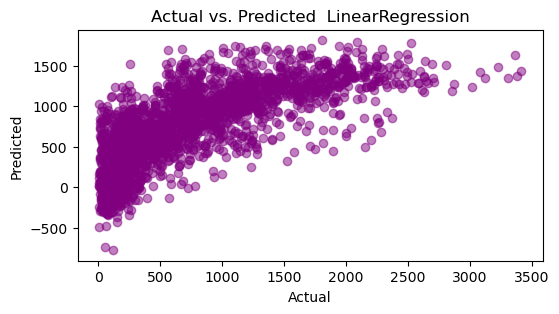

R^2 is 0.54266582125603
Fitting time 0.014000654220581055




Decision Tree:


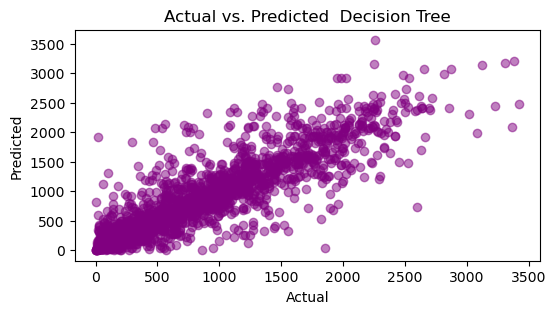

R^2 is 0.7832792690314301
Fitting time 0.030346393585205078




Random Forest:


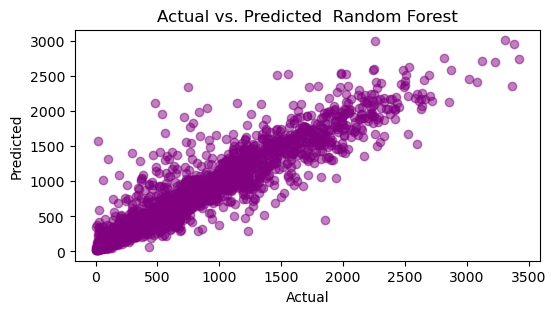

R^2 is 0.8772454645607075
Fitting time 3.414274215698242




Gradient Boosting:


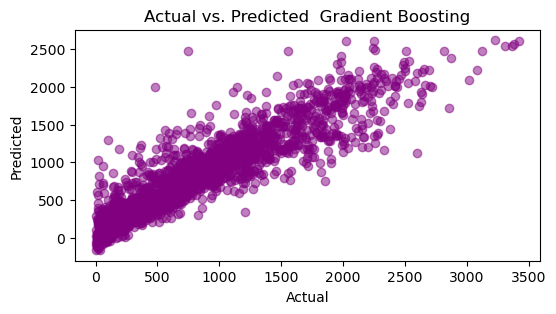

R^2 is 0.8504403581869583
Fitting time 0.9944455623626709




XGB:


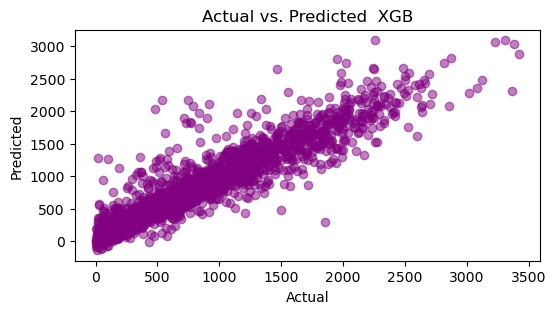

R^2 is 0.8800658692277358
Fitting time 0.2572321891784668






In [31]:
# create a data frame to store the performance of the different models
model_data = []
    
for model_name, model in reg_models:
    curr_model = {}
    curr_model['name'] = model_name
    fitted_model, fitting_time = train_model(model, X_train, y_train, X_test)
    curr_model['fitting_time'] = fitting_time
    model_score = predict_data(fitted_model, model_name, X_train, X_test, y_test, fitting_time, color = "purple")
    curr_model['model_score'] = model_score
    model_data.append(curr_model)

In [32]:
model_data = pd.DataFrame(model_data)
model_data

,name,fitting_time,model_score
0,LinearRegression,0.0140,0.5427
1,Decision Tree,0.0303,0.7833
2,Random Forest,3.4143,0.8772
3,Gradient Boosting,0.9944,0.8504
4,XGB,0.2572,0.8801


We can see that the classic linear model performs poorly compared to the other methods. Especially that there are quite a few predictions below 0 which is not a realistic scenario is concerning. RandomForest and XGBRegressor performs best. In the following we will use XGBRegressor because it has a quite similar performance compared to RandomForest. However, it is much faster.

#### Hyperparameter Tuning

In [33]:
# create the hyperparameter grid for tuning
xgboost_hyper_params = {
    "n_estimators":[250, 500, 750, 1000, 2000],
    "max_depth":[2, 4, 6, 8, 10],
    "learning_rate":[0.001, 0.01, 0.1, 1]
}

xgboost_hyper_params

{'n_estimators': [250, 500, 750, 1000, 2000],
 'max_depth': [2, 4, 6, 8, 10],
 'learning_rate': [0.001, 0.01, 0.1, 1]}

In [42]:
from sklearn.model_selection import GridSearchCV

xgb_model = XGBRegressor(random_state = 42)
# do 5-fold cross-validation using a grid search to find the best hyperparameter setting
grid_cv = GridSearchCV(xgb_model, xgboost_hyper_params, cv = 5)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
          

In [38]:
# save both grid searches for later
import joblib

# save your grid searches
#joblib.dump(grid_cv, 'grid_cv.pkl')

# load grid searches
grid_cv = joblib.load("grid_cv.pkl")

In [37]:
grid_cv.best_params_

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 2000}

For both scenarios, the best hyperparameters are a learning rate of 0.01, a max depth of the tree of 8 and a total of 2000 trees to create. Using these hyperparameters, now, a final model is fitted to predict the data.

### 6 - Putting it all together

In [39]:
# create the features and targets
X = bike_data.drop(['Rented Bike Count', 'Date'], axis=1)
y = bike_data['Rented Bike Count']

# execute a 70/30 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# standardize the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# initialize the gradient boosting with the best hyperparameters from above
xgb_model = XGBRegressor(random_state = 42, **grid_cv.best_params_)
# fit the model with the standardized X_train
xgb_model.fit(X_train_scaled, y_train)


y_pred_base = xgb_model.predict(X_test_scaled)
print(f'R squared on test set: {r2_score(y_test, y_pred_base)}')
print(f'MAE on test set: {mean_absolute_error(y_test, y_pred_base)}')

R squared on test set: 0.8908325681003647
MAE on test set: 121.84736773122953


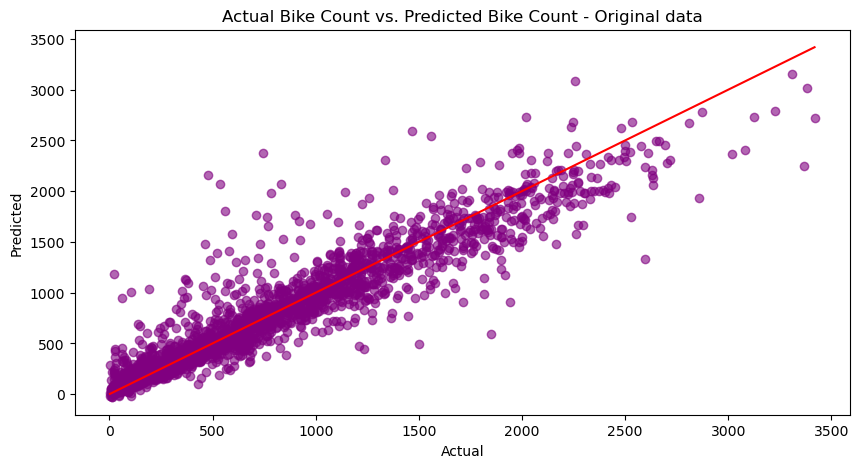

In [40]:
# plot actual vs. predicted values
fig, ax = plt.subplots(figsize = (10, 5))
plt.scatter(y_test, y_pred_base, color='purple', alpha=0.6)
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color = "red")
plt.title('Actual Bike Count vs. Predicted Bike Count - Original data')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

#### Check the number of bikes rented according to the model

In [41]:
print(f'Total number of predicted bike rents: {np.round(np.sum(y_pred_base), 0)}')

Total number of predicted bike rents: 1828088.0


The model predicts to rent a total of 1828088 bikes in for the test observations.

####  Check feature importance

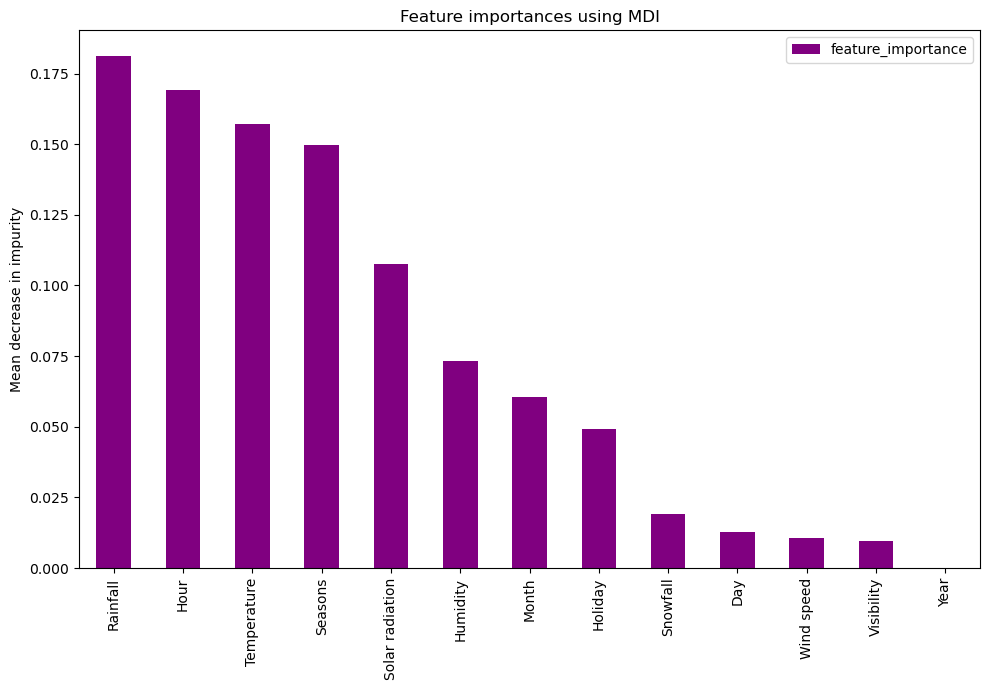

In [42]:
feature_importances = xgb_model.feature_importances_
xgb_model_importances = pd.DataFrame({'feature_importance':feature_importances}, index = X.columns).sort_values(by = 'feature_importance', ascending = False)

fig, ax = plt.subplots(figsize = (10, 7))
xgb_model_importances.plot.bar(ax=ax, color = "purple")
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
fig.savefig('feature_importance.png')

It seems like the most important features are Rainfall, Hour, Temperature, Seasons and Solar Radiation. This makes sense because most people would probably not rent a bike if it is raining or very cold. Also, in winter the bike rents are probably lowest. A more sunny day probably leads to an increase in bike rents.

A problem using XGB as a model is its interpretability or lack of. We know which features were most important in the model, however, we do not know what sign these features have. I.e., we do not know if a higher hour value (later in day) is more beneficial for rentals or earlier in a day, i.e., morning. For this, we want to test the potential signs of the features in the model.

#### Test the potential signs of the features

In [43]:
# create mean values for each variable
data_sample_1 = pd.DataFrame(bike_data.mean(numeric_only = True).round().drop("Rented Bike Count")).T

# adjust the data types of the features according to the bike_data frame
data_sample_1 = data_sample_1.astype(bike_data.drop(['Date', 'Rented Bike Count' ], axis = 1).dtypes.to_dict())

# create a new frame where we store the changes of one variable and the change in the response variable to see the sign of the feature in the model
change_frame = data_sample_1

variables_changed = [None]
# do the stuff above but change by 1 unit to see how the response changes
for col in change_frame.columns:
    curr_sample = data_sample_1.copy()
    new_value = data_sample_1[col] + 1
    curr_sample[col] = new_value
    change_frame = pd.concat([change_frame, curr_sample])
    variables_changed.append(col)
    
scaler = StandardScaler()
# scale with training set
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(change_frame)

y_pred_change = xgb_model.predict(X_test_scaled)

change_frame['Rented Bike Count'] = y_pred_change

first_count = change_frame['Rented Bike Count'].iloc[0]

# create a variable to see what a change of unit in a feature does to the response variable
change_frame['pct_change'] = (change_frame['Rented Bike Count'] - first_count)/first_count * 100

# create a variable to indicate in which feature the change happened
change_frame['changed_variable'] = variables_changed

change_frame

,Hour,Temperature,Humidity,Wind speed,Visibility,Solar radiation,Rainfall,Snowfall,Seasons,Holiday,Day,Month,Year,Rented Bike Count,pct_change,changed_variable
0,12,13.0000,58,2.0000,1434,1.0000,0.0000,0.0000,1,0,16,6,2018,887.0115,0.0000,None
0,13,13.0000,58,2.0000,1434,1.0000,0.0000,0.0000,1,0,16,6,2018,919.7886,3.6952,Hour
0,12,14.0000,58,2.0000,1434,1.0000,0.0000,0.0000,1,0,16,6,2018,931.5860,5.0252,Temperature
0,12,13.0000,59,2.0000,1434,1.0000,0.0000,0.0000,1,0,16,6,2018,881.9610,-0.5694,Humidity
0,12,13.0000,58,3.0000,1434,1.0000,0.0000,0.0000,1,0,16,6,2018,895.8373,0.9950,Wind speed
0,12,13.0000,58,2.0000,1435,1.0000,0.0000,0.0000,1,0,16,6,2018,887.0115,0.0000,Visibility
0,12,13.0000,58,2.0000,1434,2.0000,0.0000,0.0000,1,0,16,6,2018,969.7004,9.3222,Solar radiation
0,12,13.0000,58,2.0000,1434,1.0000,1.0000,0.0000,1,0,16,6,2018,679.7838,-23.3625,Rainfall
0,12,13.0000,58,2.0000,1434,1.0000,0.0000,1.0000,1,0,16,6,2018,899.7240,1.4332,Snowfall
0,12,13.0000,58,2.0000,1434,1.0000,0.0000,0.0000,2,0,16,6,2018,877.5502,-1.0666,Seasons


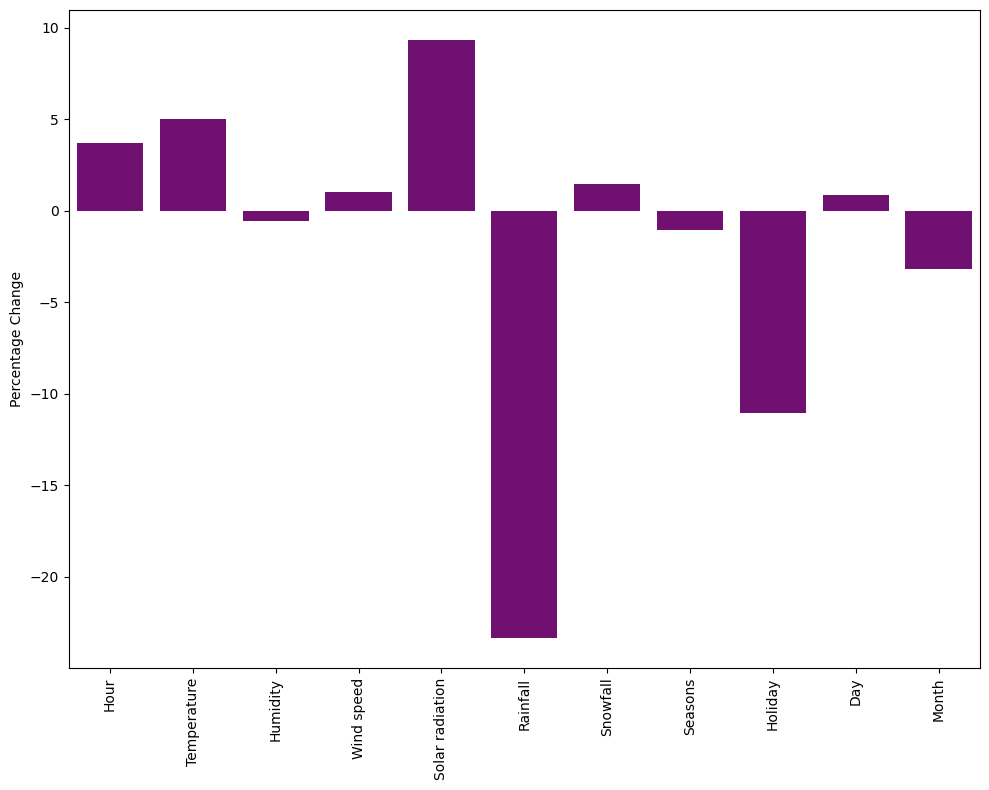

In [44]:
plot_frame = change_frame.loc[change_frame['pct_change'] != 0]
#change_frame.plot.bar(x = 'changed_variable', y = 'pct_change')
plot_frame

fig, ax = plt.subplots(figsize = (10, 8))
sns.barplot(data=plot_frame, x="changed_variable", y="pct_change", ax = ax, color = "purple")
ax.set_ylabel('Percentage Change')
ax.set_xlabel(None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
fig.tight_layout()
fig.savefig('percentage_change.png')

We can see that Hour, Temperature, Solar radiation, Snowfall and Day have a positive sign. That means that an increase in the value in one of these variables tends to increase the number of bikes rented. On the other hand, Humidity, Wind speed, Rainfall, Seasons, Holiday and Month have a negative sign. An increase in one of these values tends to decrease the number of bikes rented. Rainfall has a large negative effect, Holiday also.

### 7 - Scenarios

### 7.1 - Scenario 1: Temperature increase

#### Create the data for the scenario 1

In [45]:
# sample 70% of the data where the temperature is increased
temp_data_sub = X_test.sample(frac=0.7, replace=False, random_state=42)
# increase the temperature in the subsample by 2 degree celcius
temp_data_sub['Temperature'] = temp_data_sub['Temperature'] + 2

# get the remaining data in the temp_data_sub frame
temp_data_remaining = X_test[~X_test.isin(temp_data_sub)].dropna()

# combine the two subsets
X_test_temp = pd.concat([temp_data_sub, temp_data_remaining]).reindex(X_test.index)

# adjust the data types accordingly
X_test_temp = X_test_temp.astype(X_test.dtypes.to_dict())

X_test_temp

,Hour,Temperature,Humidity,Wind speed,Visibility,Solar radiation,Rainfall,Snowfall,Seasons,Holiday,Day,Month,Year
5993,17,35.6000,44,2.4000,1860,1.6900,0.0000,0.0000,1,0,7,8,2018
5340,12,28.1000,73,2.1000,1326,0.8700,0.0000,0.0000,1,0,11,7,2018
5951,23,30.8000,79,1.3000,1484,0.0000,0.0000,0.0000,1,0,5,8,2018
879,15,4.3000,27,2.2000,1877,0.9200,0.0000,0.0000,3,0,6,1,2018
6909,21,24.7000,61,1.6000,2000,0.0000,0.0000,0.0000,2,0,14,9,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7453,13,22.1000,41,3.0000,1963,2.3400,0.0000,0.0000,2,0,7,10,2018
2363,11,5.9000,51,0.7000,1866,0.9100,0.0000,0.0000,0,0,9,3,2018
5746,10,34.0000,65,0.9000,966,1.1900,0.0000,0.0000,1,0,28,7,2018
6269,5,25.4000,63,0.3000,2000,0.0000,0.0000,0.0000,1,0,19,8,2018


#### test the model on the newly created test set

In [46]:
# scale the data using the scaler fitted on the training set
X_test_scaled_temp = scaler.transform(X_test_temp)

# predict the bike count using the test data of scenario 1
y_pred_temp = xgb_model.predict(X_test_scaled_temp)
print(f'R squared on test set: {r2_score(y_test, y_pred_temp)}')
print(f'MAE on test set: {mean_absolute_error(y_test, y_pred_temp)}')

R squared on test set: 0.8769802221406927
MAE on test set: 131.79920161540113


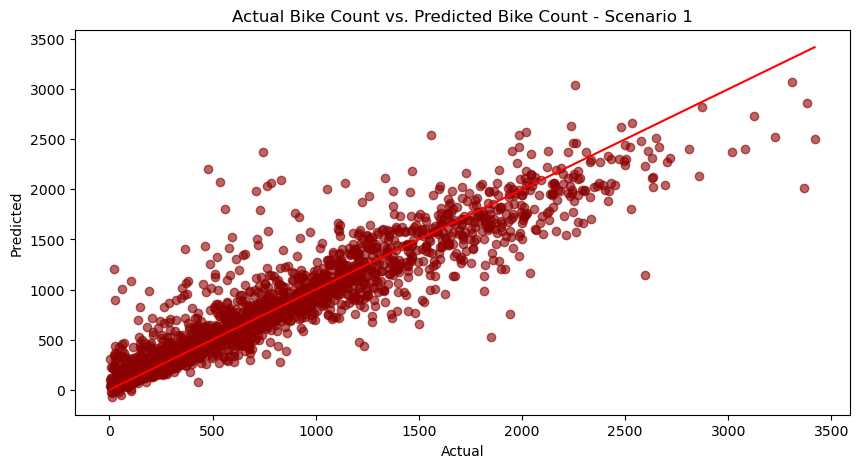

In [47]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.scatter(y_test, y_pred_temp, color='darkred', alpha=0.6)
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color = "red")
plt.title('Actual Bike Count vs. Predicted Bike Count - Scenario 1')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

#### Check the number of bikes rented according to the model

In [48]:
print(f'Total number of predicted bike rents: {np.round(np.sum(y_pred_temp), 0)}')

Total number of predicted bike rents: 1853448.0


Text(0, 0.5, 'Rented Bike Count')

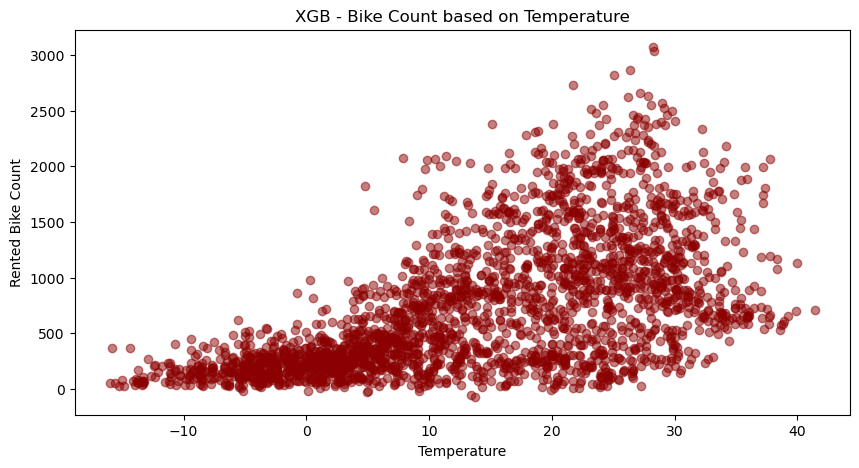

In [57]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.scatter(X_test_temp['Temperature'], y_pred_temp, color='darkred', alpha = 0.5)
#sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color = "red")
plt.title('XGB - Bike Count based on Temperature')
plt.xlabel('Temperature')
plt.ylabel('Rented Bike Count')

We can see a clear (although not linear) relationship between the temperature and the rented number of bikes which is positive. I.e., an increase in the temperature tends to go with an increase in the number of rented bikes.

### 7.2 - Scenario 2: Humidity increase

In [50]:
# sample 30% of the data where the humidity is increased
humidity_data_sub = X_test.sample(frac=0.3, replace=False, random_state=42)
# increase the humidity in the subsample by 3 pp
humidity_data_sub['Humidity'] = humidity_data_sub['Humidity'] + 3

# get the remaining data in the humidity_data_sub frame
humidity_data_remaining = X_test[~X_test.isin(humidity_data_sub)].dropna()

# combine the two subsets
X_test_humidity = pd.concat([humidity_data_sub, humidity_data_remaining]).reindex(X_test.index)

# adjust the data types accordingly
X_test_humidity = X_test_humidity.astype(X_test.dtypes.to_dict())

X_test_humidity

,Hour,Temperature,Humidity,Wind speed,Visibility,Solar radiation,Rainfall,Snowfall,Seasons,Holiday,Day,Month,Year
5993,17,35.6000,44,2.4000,1860,1.6900,0.0000,0.0000,1,0,7,8,2018
5340,12,28.1000,73,2.1000,1326,0.8700,0.0000,0.0000,1,0,11,7,2018
5951,23,28.8000,79,1.3000,1484,0.0000,0.0000,0.0000,1,0,5,8,2018
879,15,2.3000,27,2.2000,1877,0.9200,0.0000,0.0000,3,0,6,1,2018
6909,21,24.7000,61,1.6000,2000,0.0000,0.0000,0.0000,2,0,14,9,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7453,13,20.1000,44,3.0000,1963,2.3400,0.0000,0.0000,2,0,7,10,2018
2363,11,5.9000,51,0.7000,1866,0.9100,0.0000,0.0000,0,0,9,3,2018
5746,10,32.0000,68,0.9000,966,1.1900,0.0000,0.0000,1,0,28,7,2018
6269,5,23.4000,66,0.3000,2000,0.0000,0.0000,0.0000,1,0,19,8,2018


#### test the model on the newly created test set

In [51]:
# scale the data using the scaler fitted on the training set
X_test_scaled_humidity = scaler.transform(X_test_humidity)

# predict the bike count using the test data of scenario 2
y_pred_humidity = xgb_model.predict(X_test_scaled_humidity)
print(f'R squared on test set: {r2_score(y_test, y_pred_humidity)}')
print(f'MAE on test set: {mean_absolute_error(y_test, y_pred_humidity)}')

R squared on test set: 0.8908189321013822
MAE on test set: 122.0781067514044


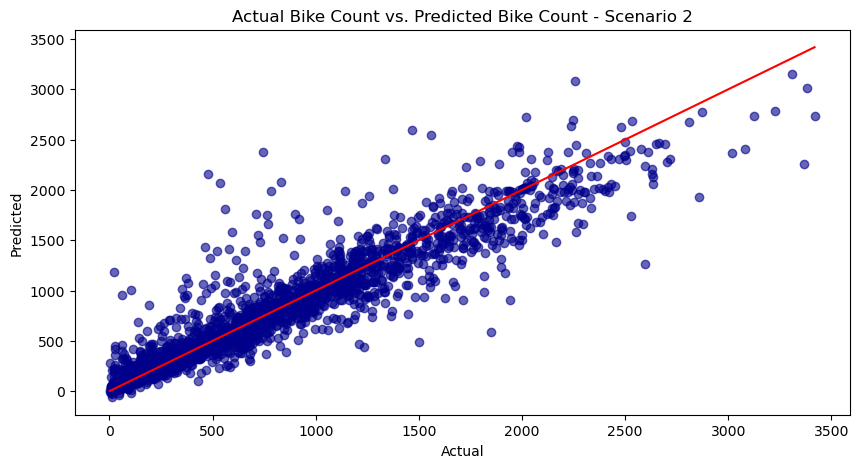

In [52]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.scatter(y_test, y_pred_humidity, color='darkblue', alpha=0.6)
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color = "red")
plt.title('Actual Bike Count vs. Predicted Bike Count - Scenario 2')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

#### Check the number of bikes rented according to the model

In [53]:
print(f'Total number of predicted bike rents: {np.round(np.sum(y_pred_humidity), 0)}')

Total number of predicted bike rents: 1819503.0


Text(0, 0.5, 'Rented Bike Count')

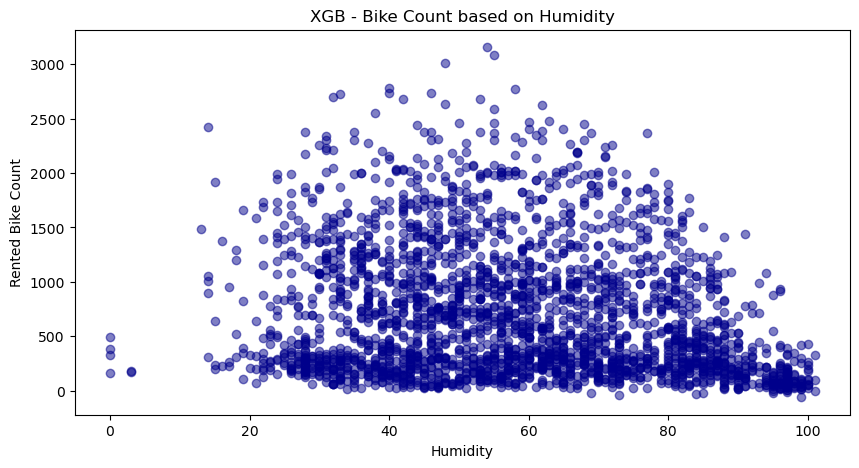

In [56]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.scatter(X_test_humidity['Humidity'], y_pred_humidity, color='darkblue', alpha = 0.5)
#sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color = "red")
ax.set_title('XGB - Bike Count based on Humidity')
ax.set_xlabel('Humidity')
ax.set_ylabel('Rented Bike Count')

There is no clear relationship visible. Although one might say that an increase in humidity seems to go with an increase in the rented number of bikes, i.e., a negative relationship.

#### Compare the results of the models

In [58]:
results_model = {}
results_model['Model'] = ['Base', 'Scenario1', 'Scenario2']
results_model['Rented Bikes'] = [1828088, 1853448, 1819503]
results_model = pd.DataFrame(results_model)

first_sum = results_model['Rented Bikes'].iloc[0]

results_model['Change_pct'] = (results_model['Rented Bikes'] - first_sum)/first_sum * 100

In [59]:
results_model

,Model,Rented Bikes,Change_pct
0,Base,1828088,0.0000
1,Scenario1,1853448,1.3872
2,Scenario2,1819503,-0.4696
